In [80]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.ensemble import  RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# os.chdir('drive/My Drive/Datasets')
os.listdir('.')

['heart.csv',
 'iris.csv',
 'pima-indians-diabetes.csv',
 'sonar.csv',
 'housing.csv',
 'winequality-white.csv',
 'auto.csv']

In [ ]:
dataset = pd.read_csv('pima-indians-diabetes.csv')

In [ ]:
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


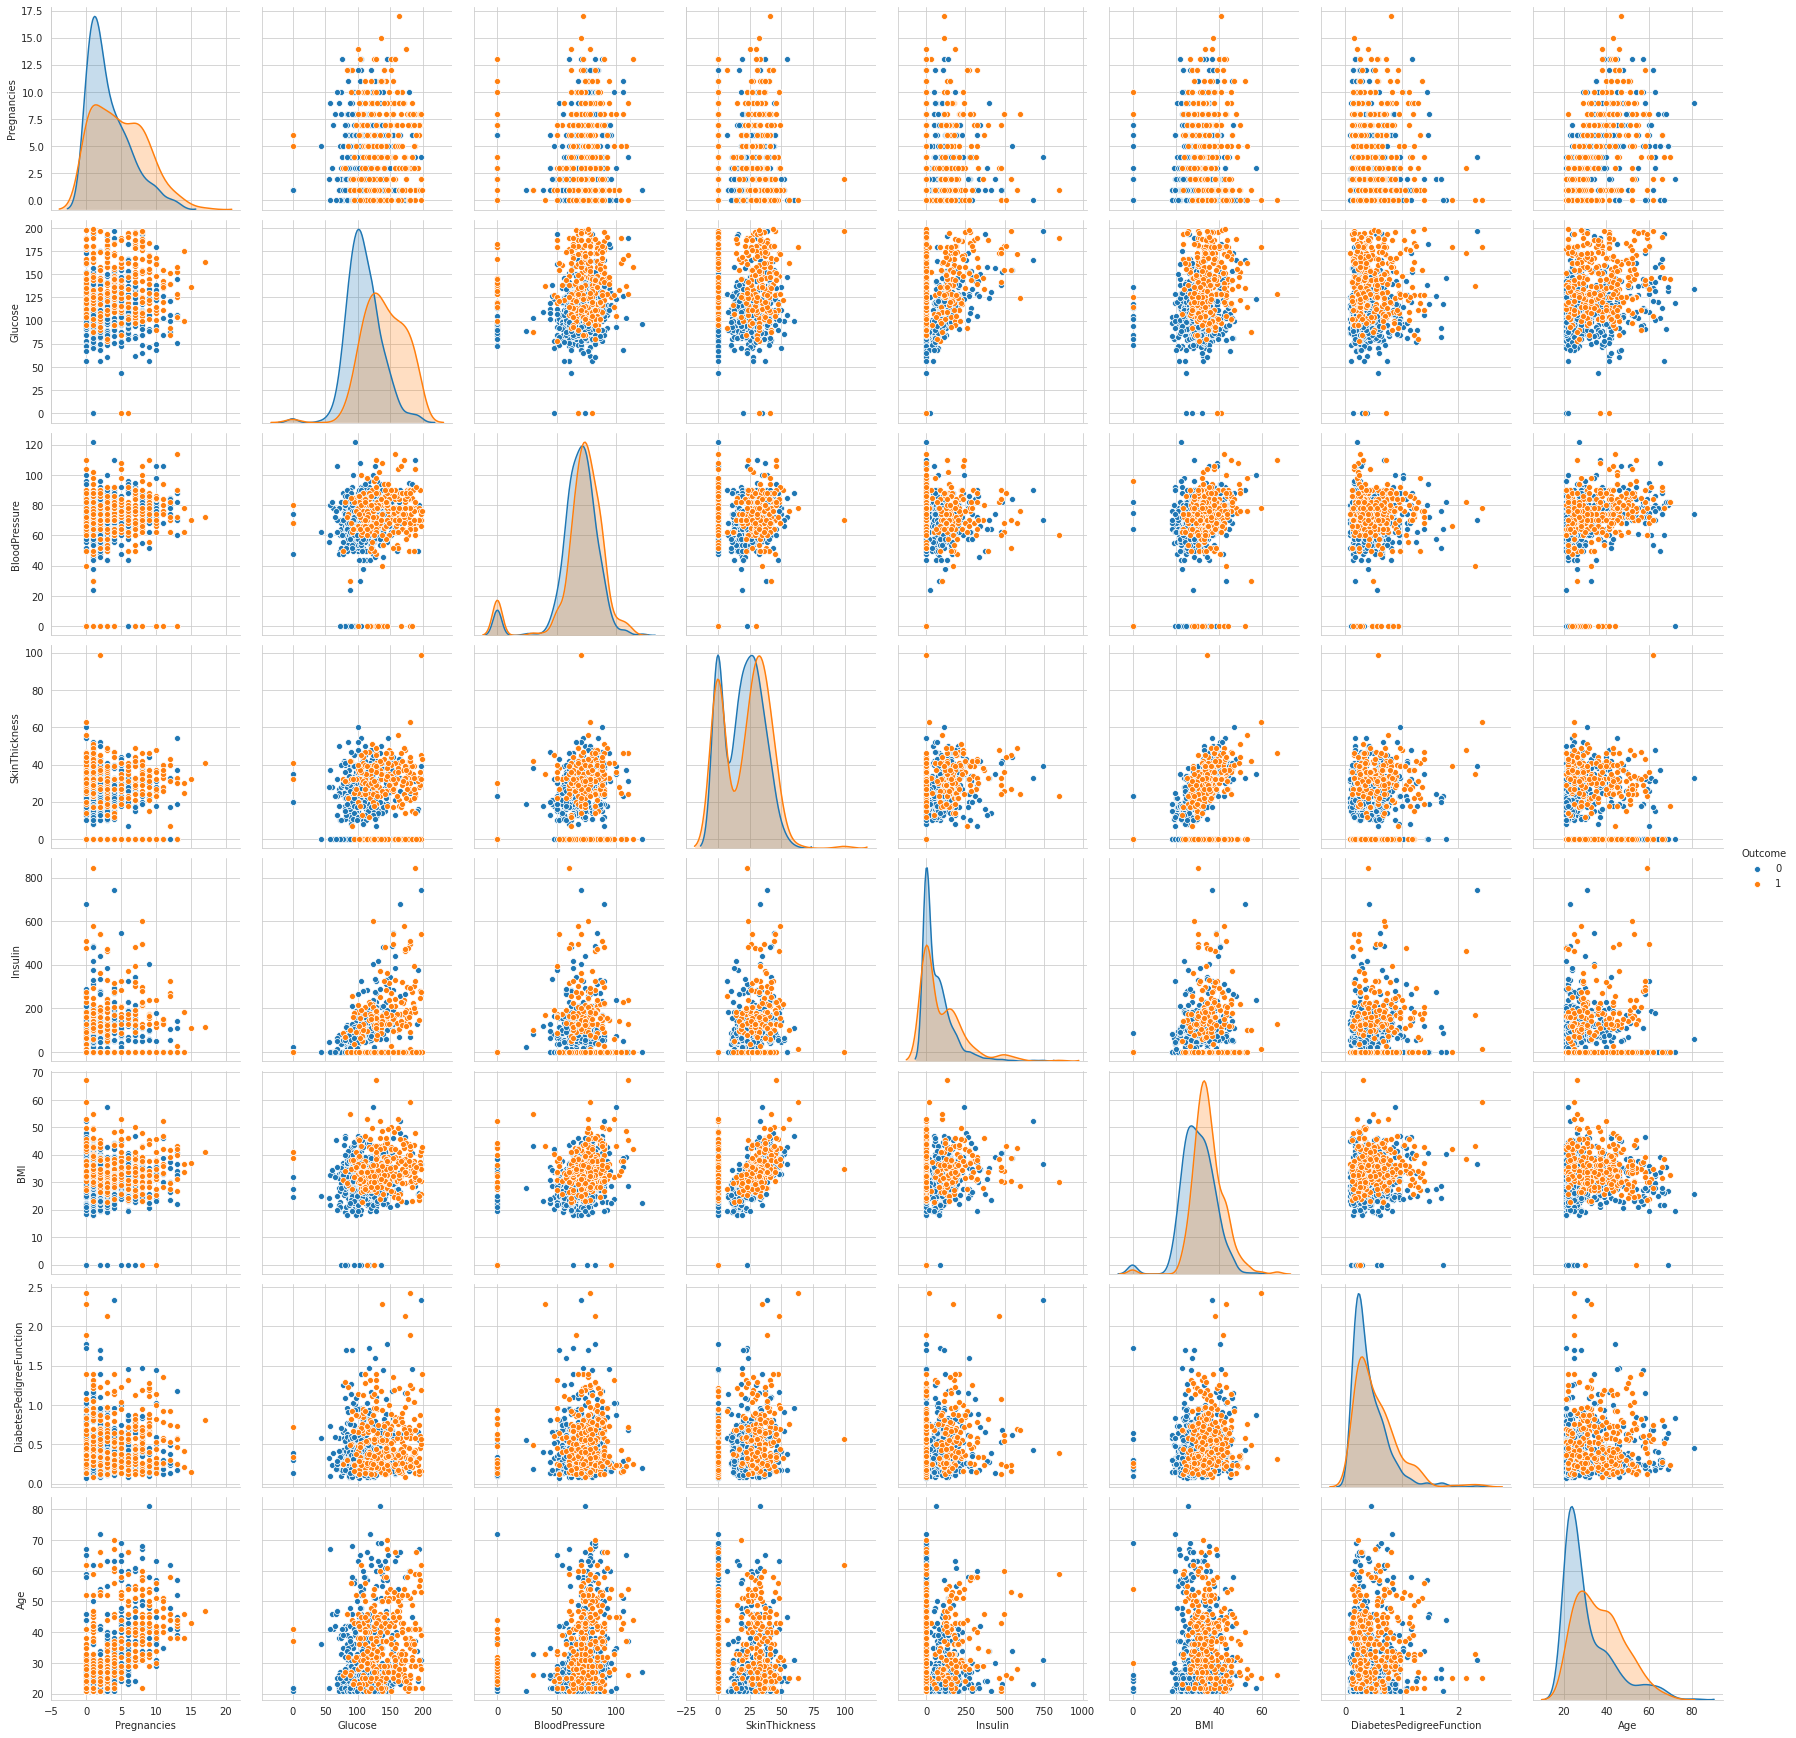

In [ ]:
sb.set_style("whitegrid");
sb.pairplot(dataset, hue="Outcome", height=3);
plt.show()

In [57]:
feature = dataset.drop(['Outcome'], axis=1) #outcome tidak dibutuhkan
label = dataset['Outcome'] #target prediksi

print(dataset['Outcome'].value_counts())

0    500
1    268
Name: Outcome, dtype: int64


In [ ]:
scaler = preprocessing.StandardScaler()

feature_scaled = scaler.fit_transform(feature.values) 

In [69]:
feature_train, feature_test, label_train, label_test = train_test_split(feature_scaled, label, test_size=0.2, random_state=10)

# smt = SMOTE()
# feature_train, label_train = smt.fit_sample(feature_train, label_train)
# np.bincount(label_train)

In [70]:
#Random Forest Classification
random_forest = RandomForestClassifier(n_estimators=800, bootstrap=True, max_features = "sqrt")
random_forest.fit(feature_train, label_train)

predictions = random_forest.predict(feature_train)

print("prediksi menggunakan training set")
print('Akurasi dari Testing Set: {:.3f}'.format(random_forest.score(feature_test, label_test))) # .score() -> Accuracy
print("f1 score")
print(f1_score(label_train, predictions, average='macro'))
print("precision score")
print(precision_score(label_train, predictions, average='macro'))
print("recall score")
print(recall_score(label_train, predictions, average='macro'))

predictions = random_forest.predict(feature_test)

print("\nprediksi menggunakan testing set")
print('Akurasi dari Testing Set: {:.3f}'.format(random_forest.score(feature_test, label_test))) # .score() -> Accuracy
print("f1 score")
print(f1_score(label_test, predictions, average='macro'))
print("precision score")
print(precision_score(label_test, predictions, average='macro'))
print("recall score")
print(recall_score(label_test, predictions, average='macro'))

prediksi menggunakan training set
Akurasi dari Testing Set: 0.753
f1 score
1.0
precision score
1.0
recall score
1.0

prediksi menggunakan testing set
Akurasi dari Testing Set: 0.753
f1 score
0.7156462585034014
precision score
0.7585284280936455
recall score
0.7068688670829617


In [71]:
#k-NN
knn = KNeighborsClassifier(21)
knn.fit(feature_train, label_train)

predictions = knn.predict(feature_train)

print("prediksi menggunakan training set")
print('Akurasi dari Testing Set: {:.3f}'.format(knn.score(feature_test, label_test))) # .score() -> Accuracy
print("f1 score")
print(f1_score(label_train, predictions, average='macro'))
print("precision score")
print(precision_score(label_train, predictions, average='macro'))
print("recall score")
print(recall_score(label_train, predictions, average='macro'))

predictions = knn.predict(feature_test)

print("\nprediksi menggunakan testing set")
print('Akurasi dari Testing Set: {:.3f}'.format(knn.score(feature_test, label_test))) # .score() -> Accuracy
print("f1 score")
print(f1_score(label_test, predictions, average='macro'))
print("precision score")
print(precision_score(label_test, predictions, average='macro'))
print("recall score")
print(recall_score(label_test, predictions, average='macro'))

prediksi menggunakan training set
Akurasi dari Testing Set: 0.721
f1 score
0.7390882049414194
precision score
0.7721861471861472
recall score
0.7258136924803591

prediksi menggunakan testing set
Akurasi dari Testing Set: 0.721
f1 score
0.6688172043010753
precision score
0.7259803921568628
recall score
0.6644959857270294


In [82]:
#GradienBoosting

GB_classi = GradientBoostingClassifier(n_estimators=50)
GB_classi.fit(feature_train, label_train)


predictions = GB_classi.predict(feature_train)

print("prediksi menggunakan training set")
print('Akurasi dari Training Set: {:.3f}'.format(GB_classi.score(feature_train, label_train))) # .score() -> Accuracy
print("f1 score")
print(f1_score(label_train, predictions, average='macro'))
print("precision score")
print(precision_score(label_train, predictions, average='macro'))
print("recall score")
print(recall_score(label_train, predictions, average='macro'))

predictions = GB_classi.predict(feature_test)

print("\nprediksi menggunakan testing set")
print('Akurasi dari Testing Set: {:.3f}'.format(GB_classi.score(feature_test, label_test))) # .score() -> Accuracy
print("f1 score")
print(f1_score(label_test, predictions, average='macro'))
print("precision score")
print(precision_score(label_test, predictions, average='macro'))
print("recall score")
print(recall_score(label_test, predictions, average='macro'))

prediksi menggunakan training set
Akurasi dari Training Set: 0.879
f1 score
0.8598069707740916
precision score
0.8813537260006508
recall score
0.8461220391044952

prediksi menggunakan testing set
Akurasi dari Testing Set: 0.773
f1 score
0.7421916104653944
precision score
0.7767857142857143
recall score
0.732292595896521


In [73]:
#SVM
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(feature_train, label_train)

predictions = svm_classifier.predict(feature_train)

print("prediksi menggunakan training set")
print('Akurasi dari Training Set: {:.3f}'.format(svm_classifier.score(feature_train, label_train))) # .score() -> Accuracy
print("f1 score")
print(f1_score(label_train, predictions, average='macro'))
print("precision score")
print(precision_score(label_train, predictions, average='macro'))
print("recall score")
print(recall_score(label_train, predictions, average='macro'))

predictions = svm_classifier.predict(feature_test)

print("\nprediksi menggunakan testing set")
print('Akurasi dari Testing Set: {:.3f}'.format(svm_classifier.score(feature_test, label_test))) # .score() -> Accuracy
print("f1 score")
print(f1_score(label_test, predictions, average='macro'))
print("precision score")
print(precision_score(label_test, predictions, average='macro'))
print("recall score")
print(recall_score(label_test, predictions, average='macro'))

prediksi menggunakan training set
Akurasi dari Training Set: 0.775
f1 score
0.7355034462091699
precision score
0.7556162842101033
recall score
0.7254297359560518

prediksi menggunakan testing set
Akurasi dari Testing Set: 0.760
f1 score
0.7216006253969804
precision score
0.7697368421052632
recall score
0.7121320249776985


In [74]:
#Linear SVC
classifier_linear_svc = SVC()
classifier_linear_svc.fit(feature_train, label_train)

predictions = classifier_linear_svc.predict(feature_train)

print("prediksi menggunakan training set")
print('Akurasi dari Training Set: {:.3f}'.format(classifier_linear_svc.score(feature_train, label_train))) # .score() -> Accuracy
print("f1 score")
print(f1_score(label_train, predictions, average='macro'))
print("precision score")
print(precision_score(label_train, predictions, average='macro'))
print("recall score")
print(recall_score(label_train, predictions, average='macro'))

predictions = classifier_linear_svc.predict(feature_test)

print("\nprediksi menggunakan testing set")
print('Akurasi dari Testing Set: {:.3f}'.format(classifier_linear_svc.score(feature_test, label_test))) # .score() -> Accuracy
print("f1 score")
print(f1_score(label_test, predictions, average='macro'))
print("precision score")
print(precision_score(label_test, predictions, average='macro'))
print("recall score")
print(recall_score(label_test, predictions, average='macro'))

prediksi menggunakan training set
Akurasi dari Training Set: 0.840
f1 score
0.8116069080389234
precision score
0.8391172302085442
recall score
0.7968102073365231

prediksi menggunakan testing set
Akurasi dari Testing Set: 0.747
f1 score
0.7031875463306153
precision score
0.7575329566854991
recall score
0.6951828724353256


In [75]:
#XGBoost
xgb_model = xgb.XGBClassifier(objective="reg:squarederror")
xgb_model.fit(feature_train, label_train)

predictions = xgb_model.predict(feature_train)

print("prediksi menggunakan training set")
print('Akurasi dari Training Set: {:.3f}'.format(xgb_model.score(feature_train, label_train))) # .score() -> Accuracy
print("f1 score")
print(f1_score(label_train, predictions, average='macro'))
print("precision score")
print(precision_score(label_train, predictions, average='macro'))
print("recall score")
print(recall_score(label_train, predictions, average='macro'))

predictions = xgb_model.predict(feature_test)

print("\nprediksi menggunakan testing set")
print('Akurasi dari Testing Set: {:.3f}'.format(xgb_model.score(feature_test, label_test))) # .score() -> Accuracy
print("f1 score")
print(f1_score(label_test, predictions, average='macro'))
print("precision score")
print(precision_score(label_test, predictions, average='macro'))
print("recall score")
print(recall_score(label_test, predictions, average='macro'))

prediksi menggunakan training set
Akurasi dari Training Set: 0.919
f1 score
0.9052749802527646
precision score
0.9293068662544745
recall score
0.8896449878906019

prediksi menggunakan testing set
Akurasi dari Testing Set: 0.760
f1 score
0.7301444470755387
precision score
0.7568181818181818
recall score
0.7217662801070472


In [76]:
#Gaussian Process Classifier
gaus_pc = GaussianProcessClassifier() 
gaus_pc.fit(feature_train, label_train)

predictions = gaus_pc.predict(feature_train)

print("prediksi menggunakan training set")
print('Akurasi dari Training Set: {:.3f}'.format(gaus_pc.score(feature_train, label_train))) # .score() -> Accuracy
print("f1 score")
print(f1_score(label_train, predictions, average='macro'))
print("precision score")
print(precision_score(label_train, predictions, average='macro'))
print("recall score")
print(recall_score(label_train, predictions, average='macro'))

predictions = gaus_pc.predict(feature_test)

print("\nprediksi menggunakan testing set")
print('Akurasi dari Testing Set: {:.3f}'.format(gaus_pc.score(feature_test, label_test))) # .score() -> Accuracy
print("f1 score")
print(f1_score(label_test, predictions, average='macro'))
print("precision score")
print(precision_score(label_test, predictions, average='macro'))
print("recall score")
print(recall_score(label_test, predictions, average='macro'))

prediksi menggunakan training set
Akurasi dari Training Set: 0.907
f1 score
0.8918596567120367
precision score
0.916118077324974
recall score
0.8763719061964677

prediksi menggunakan testing set
Akurasi dari Testing Set: 0.714
f1 score
0.6742307692307692
precision score
0.704295273041226
recall score
0.6688670829616414


In [77]:
#MLP Classifier
mlp_classi = MLPClassifier(hidden_layer_sizes=(3,), activation='logistic',
                       solver='adam', alpha=0.0001,learning_rate='constant', 
                      learning_rate_init=0.3)
mlp_classi.fit(feature_train, label_train)

predictions = mlp_classi.predict(feature_train)

print("prediksi menggunakan training set")
print('Akurasi dari Training Set: {:.3f}'.format(mlp_classi.score(feature_train, label_train))) # .score() -> Accuracy
print("f1 score")
print(f1_score(label_train, predictions, average='macro'))
print("precision score")
print(precision_score(label_train, predictions, average='macro'))
print("recall score")
print(recall_score(label_train, predictions, average='macro'))

predictions = mlp_classi.predict(feature_test)

print("\nprediksi menggunakan testing set")
print('Akurasi dari Testing Set: {:.3f}'.format(mlp_classi.score(feature_test, label_test))) # .score() -> Accuracy
print("f1 score")
print(f1_score(label_test, predictions, average='macro'))
print("precision score")
print(precision_score(label_test, predictions, average='macro'))
print("recall score")
print(recall_score(label_test, predictions, average='macro'))

prediksi menggunakan training set
Akurasi dari Training Set: 0.764
f1 score
0.7468689137511906
precision score
0.7416710851891128
recall score
0.7584677181168409

prediksi menggunakan testing set
Akurasi dari Testing Set: 0.727
f1 score
0.711507582515611
precision score
0.711507582515611
recall score
0.711507582515611


In [78]:
#ADA Boost
ada_boost = AdaBoostClassifier(n_estimators=250, random_state=15)
ada_boost.fit(feature_train, label_train)

predictions = ada_boost.predict(feature_train)

print("prediksi menggunakan training set")
print('Akurasi dari Training Set: {:.3f}'.format(ada_boost.score(feature_train, label_train))) # .score() -> Accuracy
print("f1 score")
print(f1_score(label_train, predictions, average='macro'))
print("precision score")
print(precision_score(label_train, predictions, average='macro'))
print("recall score")
print(recall_score(label_train, predictions, average='macro'))

predictions = ada_boost.predict(feature_test)

print("\nprediksi menggunakan testing set")
print('Akurasi dari Testing Set: {:.3f}'.format(ada_boost.score(feature_test, label_test))) # .score() -> Accuracy
print("f1 score")
print(f1_score(label_test, predictions, average='macro'))
print("precision score")
print(precision_score(label_test, predictions, average='macro'))
print("recall score")
print(recall_score(label_test, predictions, average='macro'))

prediksi menggunakan training set
Akurasi dari Training Set: 0.906
f1 score
0.8930236470248967
precision score
0.9006303163821063
recall score
0.8867151042589638

prediksi menggunakan testing set
Akurasi dari Testing Set: 0.734
f1 score
0.7112544016097315
precision score
0.7188914027149321
recall score
0.7071364852809991


In [79]:
#DecisionTreeClassifier
dec_tc = DecisionTreeClassifier()

dec_tc.fit(feature_train, label_train)

predictions = dec_tc.predict(feature_train)

print("prediksi menggunakan training set")
print('Akurasi dari Training Set: {:.3f}'.format(dec_tc.score(feature_train, label_train))) # .score() -> Accuracy
print("f1 score")
print(f1_score(label_train, predictions, average='macro'))
print("precision score")
print(precision_score(label_train, predictions, average='macro'))
print("recall score")
print(recall_score(label_train, predictions, average='macro'))

predictions = dec_tc.predict(feature_test)

print("\nprediksi menggunakan testing set")
print('Akurasi dari Testing Set: {:.3f}'.format(dec_tc.score(feature_test, label_test))) # .score() -> Accuracy
print("f1 score")
print(f1_score(label_test, predictions, average='macro'))
print("precision score")
print(precision_score(label_test, predictions, average='macro'))
print("recall score")
print(recall_score(label_test, predictions, average='macro'))

prediksi menggunakan training set
Akurasi dari Training Set: 1.000
f1 score
1.0
precision score
1.0
recall score
1.0

prediksi menggunakan testing set
Akurasi dari Testing Set: 0.721
f1 score
0.6947120925729566
precision score
0.7050000000000001
recall score
0.6901873327386262


Untuk data diabetes.csv Nilai Akurasi yang paling tinggi didapatkan dengan menggunakan algoritma Gradien Boosting dengan nilai Akurasi : 0.773